In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [4]:
df = pd.read_csv("../data/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape


(200, 5)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [9]:
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


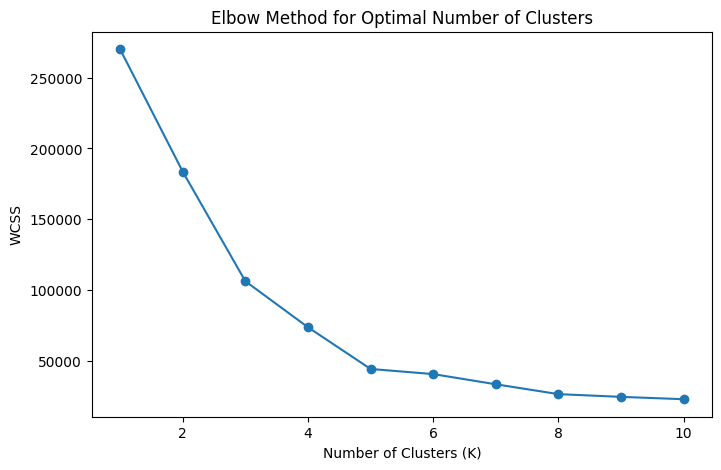

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.savefig("../figures/task2_elbow_plot.png")
plt.show()


In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [12]:
df['Cluster'] = y_kmeans
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


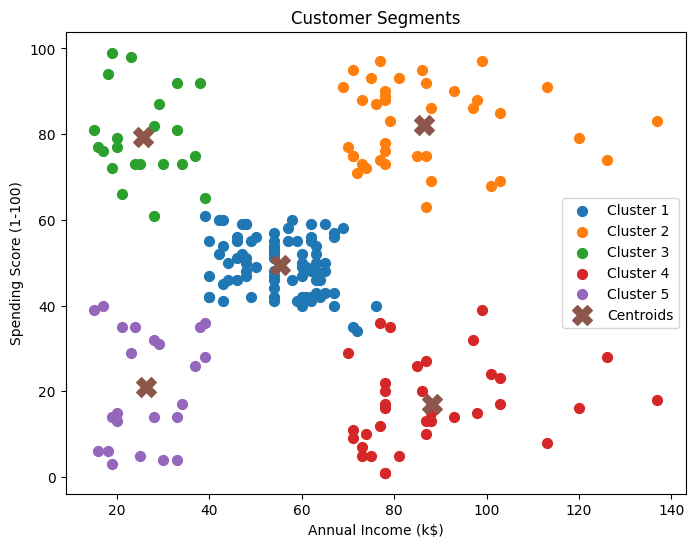

In [15]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1],
    s=50, label='Cluster 1'
)
plt.scatter(
    X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1],
    s=50, label='Cluster 2'
)
plt.scatter(
    X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1],
    s=50, label='Cluster 3'
)
plt.scatter(
    X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1],
    s=50, label='Cluster 4'
)
plt.scatter(
    X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1],
    s=50, label='Cluster 5'
)

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, marker='X', label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig("../figures/task2_customer_segments.png")
plt.show()


In [16]:
df.to_csv("../outputs/customer_segments.csv", index=False)
